In [31]:
import re
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../input/Language Detection.csv')

In [3]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
df['Language'].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [5]:
x = df["Text"]
y = df["Language"]

In [6]:
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
y

array([3, 3, 3, ..., 9, 9, 9])

In [10]:
data_list = []

for text in x:
    text = re.sub(r'[!@#$(),"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    
    text = text.lower()
    data_list.append(text)

In [12]:
data_list[1]

' nature  can refer to the phenomena of the physical world  and also to life in general.'

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [16]:
X.shape

(10337, 39404)

In [18]:
cv.get_feature_names_out()

array(['aa', 'aan', 'aanbieden', ..., 'ൾക', 'ൾപ', 'ൾമ'], dtype=object)

In [24]:
from sklearn.model_selection import train_test_split
return

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [27]:
y_pred = model.predict(x_test)

In [29]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.980174081237911


In [33]:
cm

array([[ 99,   0,   0,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,  88,   0,   1,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   3,   0,   0],
       [  0,   0, 113,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0, 268,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   2, 192,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   0],
       [  0,   0,   0,   1,   0,  84,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,  65,   0,   0,   0,   1,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  11,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0, 114,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   3,   0,   0,   0,   0,   0,  67,   0,   0,   0,
         

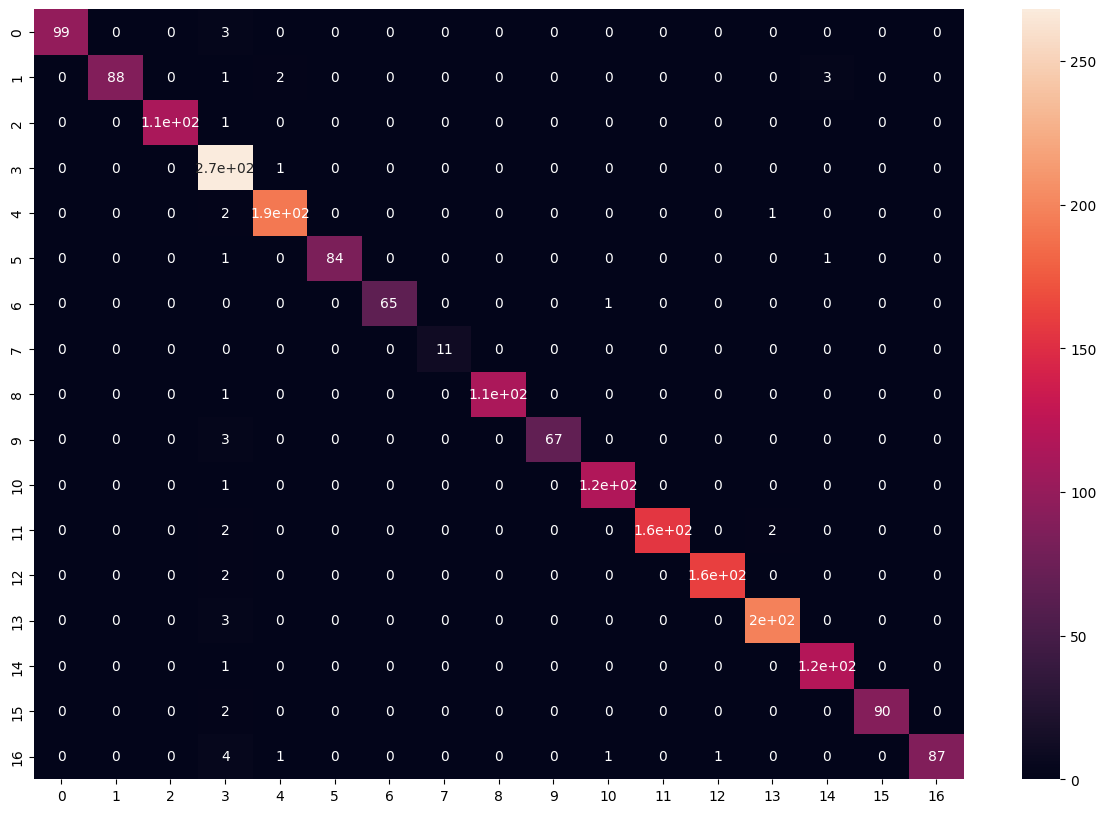

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()